In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import matplotlib.cm as cm
from AprilTagHelperFunctions import *

In [2]:
#"camera_matrix": [ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]
cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))

camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )


In [3]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)


3


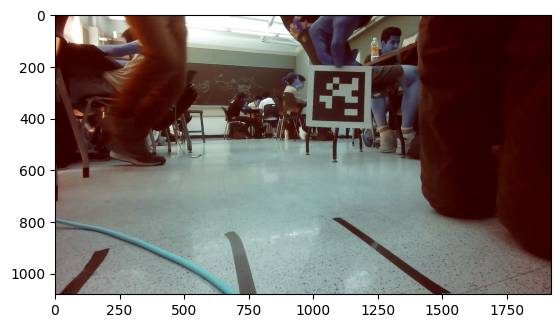

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [6]:
cap = cv2.VideoCapture('AprilTagTest.mkv', cv2.IMREAD_GRAYSCALE)
img_array = []
i = 0
ret = True
while ret:
    if i > 3:
        break
    ret, frame = cap.read()
    
    if(i%1 == 0 and i > 0):
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        print (len(frame.shape))
        plt.imshow(frame)
        plt.show()
        GrayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        tags = at_detector.detect(GrayFrame, True, camera_params, 10)
        frame = putTagsOnImage(GrayFrame,tags)
        color_img = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
        plt.imshow(color_img)
        plt.show()
    i += 1

        

NameError: name 'color_img' is not defined